# Modélisation de la trajectoire libre au tennis de table

## Objectif

Compte tenu de conditions initiales, on veut pouvoir modéliser la trajectoire de la balle entre deux rebonds (qu'on appellera trajectoire libre). Dans le cas où les équations ne sont pas linéaires, il faut proposer une solution numérique de leur résolution.

## Hypothèses

La vitesse de rotation de la balle reste constante au cours de la trajectoire.
La balle est soumis à trois force : son poids, les frottements de l'air et l'effet Magnus dû à sa rotation.
On considère le repère suivant :

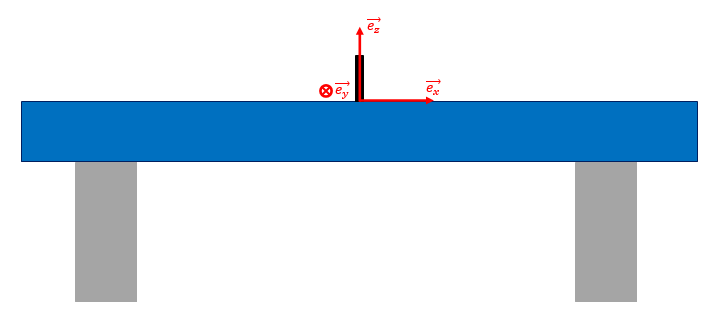

Le poids de la balle, noté $\vec{P}$ vaut : $\vec{P} = m\vec{g} = -mg\vec{z}$.  
Les frottements de la l'air sur la balle, compte tenu de sa grande vitesse peuvent être modélisé par : $\vec{F_{frot}} = -\frac{1}{2} \rho C_x S v \vec{v} = -h v \vec{v}$.  
L'effet Magnus induit une force $\vec{F_{magnus}} = \alpha ( \vec{\omega} \wedge \vec{v})$.

Pour rappel, les dimensions de la table sont fixées. La figure suivante les précise :
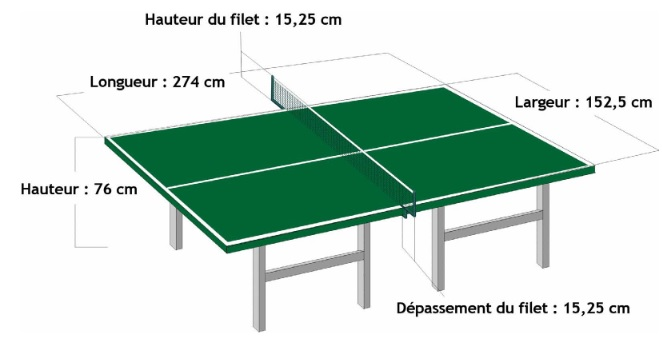

## Méthodologie et code

La deuxième loi de Newton appliquée à la balle donne lieu à un système de trois équations non linéaires :

\begin{equation}
    \begin{cases}
      m\ddot{x} = -h \dot{x} \sqrt{\dot{x}^2+\dot{y}^2+\dot{z}^2} + \alpha (\omega_y\dot{z}-\omega_z\dot{y})\\
      m\ddot{y} = -h \dot{y} \sqrt{\dot{x}^2+\dot{y}^2+\dot{z}^2} + \alpha (\omega_z\dot{x}-\omega_x\dot{z})\\
      m\ddot{z} = -h \dot{z} \sqrt{\dot{x}^2+\dot{y}^2+\dot{z}^2} + \alpha (\omega_x\dot{y}-\omega_y\dot{x}) - mg
    \end{cases}
\end{equation}

On va donc résoudre ce système numériquement, par la méthode d'Euler.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# -- Forces du problème -- #

def fMagnus(alpha,omega,v): # réel, array, array
    return alpha*np.cross(omega,v)

def fFrot(h,v): # réel, array
    return -h*np.linalg.norm(v)*v

def fPoids(m,g): # réel, array
    return m*g

# -- Trajectoire -- #

def Euler(pas,acc,vit,pos): # réel, array, array, array
    pos2=np.array([0.,0.,0.])
    vit2=np.array([0.,0.,0.])
    for i in range (3):
        pos2[i]=pos[i]+vit[i]*pas
        vit2[i]=vit[i]+acc[i]*pas
    return vit2,pos2

def TrajectoireLibre(posIni,vitIni,omega,m,alpha,h,accPes,dimX,dimY,dt): # array, array, array, réels
    # Mémoire au cours de la trajectoire
    position=np.array([posIni])
    vitesse=np.array([vitIni])
    acceleration=np.array(np.empty((0,3)))
    
    # Tableaux pour les calculs
    g=np.array([0,0,-accPes])
    vit=np.array(vitIni)
    pos=np.array(posIni)
    while(pos[2]>0): # balle au dessus de la table
        # Calcul
        acc=(fMagnus(alpha,omega,vit)+fFrot(h, vit)+fPoids(m,g))/m
        vit,pos=Euler(dt,acc,vit,pos)
        # Stockage
        position = np.append(position,[pos],axis=0)
        vitesse = np.append(vitesse,[vit],axis=0)
        acceleration = np.append(acceleration,[acc],axis=0)
    
    if ((abs(pos[0])<dimX/2) and (abs(pos[1])<dimY/2)):
        print("Rebond sur la table")
    else:
        print("La balle est faute")
    
    acc=(fMagnus(alpha,omega,vit)+fFrot(h, vit)+fPoids(m,g))/m
    acceleration = np.append(acceleration,[acc],axis=0)
    
    return acceleration,vitesse,position

In [16]:
dt = 1e-3
masse = 2.7e-3
rayon = 20e-3
accPes = 9.81
alpha = 1.8e-5
Cx = 0.4
rho = 1.2
longueurTable = 274e-2
largeurTable = 152.5e-2


x0=float(input("Entrez la position initiale :\nx0 = "))
y0=float(input("y0 = "))
z0=float(input("z0 = "))
vx0=float(input("Entrez la vitesse initiale :\nvx0 = "))
vy0=float(input("vy0 = "))
vz0=float(input("vz0 = "))
wx=float(input("Entrez la vitesse de rotation :\nwx = "))
wy=float(input("wy = "))
wz=float(input("wz = "))

positionInitiale = np.array([x0,y0,z0])
vitesseInitiale = np.array([vx0,vy0,vz0])
vitesseRotation = np.array([wx,wy,wz])

S = np.pi * rayon**2
h = 1/2*rho*Cx*S

Entrez la position initiale :
x0 = 0
y0 = 0
z0 = 0.2
Entrez la vitesse initiale :
vx0 = 2
vy0 = 1
vz0 = 5
Entrez la vitesse de rotation :
wx = 0
wy = 0
wz = 0


In [17]:
## -- Calcul et tracé -- ##

acc,vit,pos= TrajectoireLibre(positionInitiale, vitesseInitiale, vitesseRotation, masse, alpha, h, accPes, longueurTable, largeurTable, dt)

pos2= np.swapaxes(pos,0,1)
x = pos2[0]
y = pos2[1]
z = pos2[2]
vit2= np.swapaxes(vit,0,1)
vx = vit2[0]
vy = vit2[1]
vz = vit2[2]
acc2= np.swapaxes(acc,0,1)
ax = acc2[0]
ay = acc2[1]
az = acc2[2]
tps = np.linspace(0,(len(x)-1)*dt,len(x))


%matplotlib qt 
fig = plt.figure('Trajectoire de la balle')
axs=fig.add_subplot(2,2,1)
axs.plot(tps,x)
axs.set_title('x(t)')
axs.grid()
axs.set_xlabel('Temps en s')
axs.set_ylabel('x en m')

axs=fig.add_subplot(2,2,2)
axs.plot(tps,y)
axs.set_title('y(t)')
axs.grid()
axs.set_xlabel('Temps en s')
axs.set_ylabel('y en m')

axs=fig.add_subplot(2,2,3)
axs.plot(tps,z)
axs.set_title('z(t)')
axs.grid()
axs.set_xlabel('Temps en s')
axs.set_ylabel('z en m')

axs=fig.add_subplot(2,2,4,projection='3d')
axs.plot3D(x,y,z)
axs.set_title('Trajectoire')
axs.set_xlabel('x(t)')
axs.set_ylabel('y(t)')
axs.set_zlabel('z(t)');

plt.show()

La balle est faute


## Résultats

Le modèle utilisé permet une analyse qualitative de l'importance des effets sur la trajectoire libre de la balle. Pour rappel, on peut différencier trois grands type d'effets au tennis de table : le coup lifté (top-spin), le coup coupé (back-spin) et le side-spin.

Avant de détailler l'impact de chacun d'entre eux, on représente une trajectoire possible sans effets.
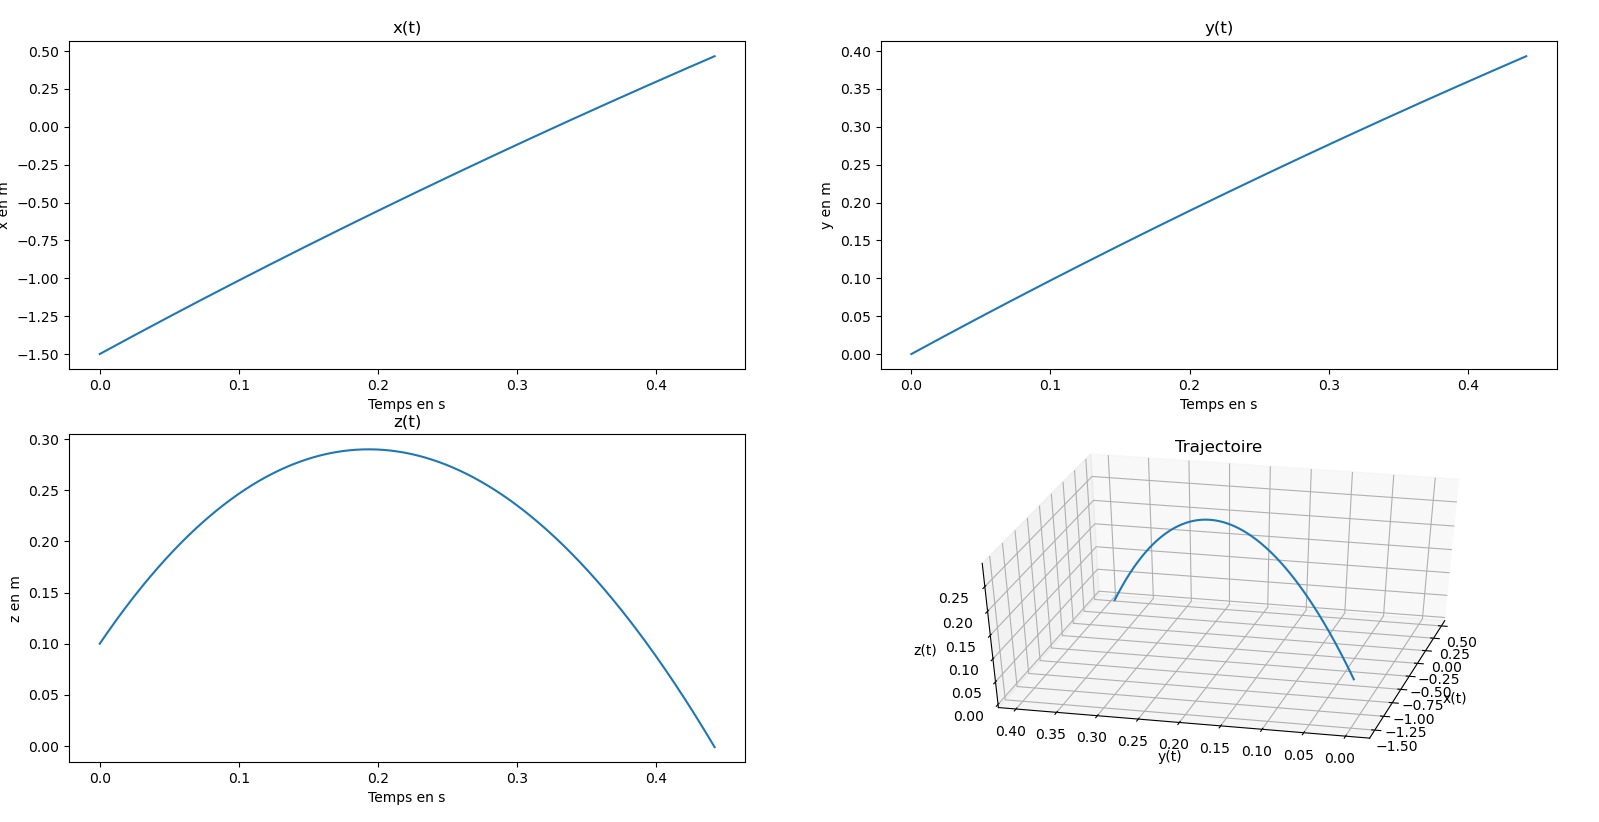

### Effet top-spin

Cet effet corrsepond à une vitesse de rotation de la balle négative sur $\vec{e_x}$ et/ou positive sur $\vec{e_y}$ de façon à ce que la composante de $\vec{F_{magnus}}$ sur $\vec{e_z}$ soit négative.
Globalemenent, on observe que la balle tombe plus vite mais que la courbe de z(t) reste une courbe en cloche (sauf si $v_{z_0}=0$).
Dans le plan (xy), il y a peu de différence entre un trajectoire avec et sans effet lifté 
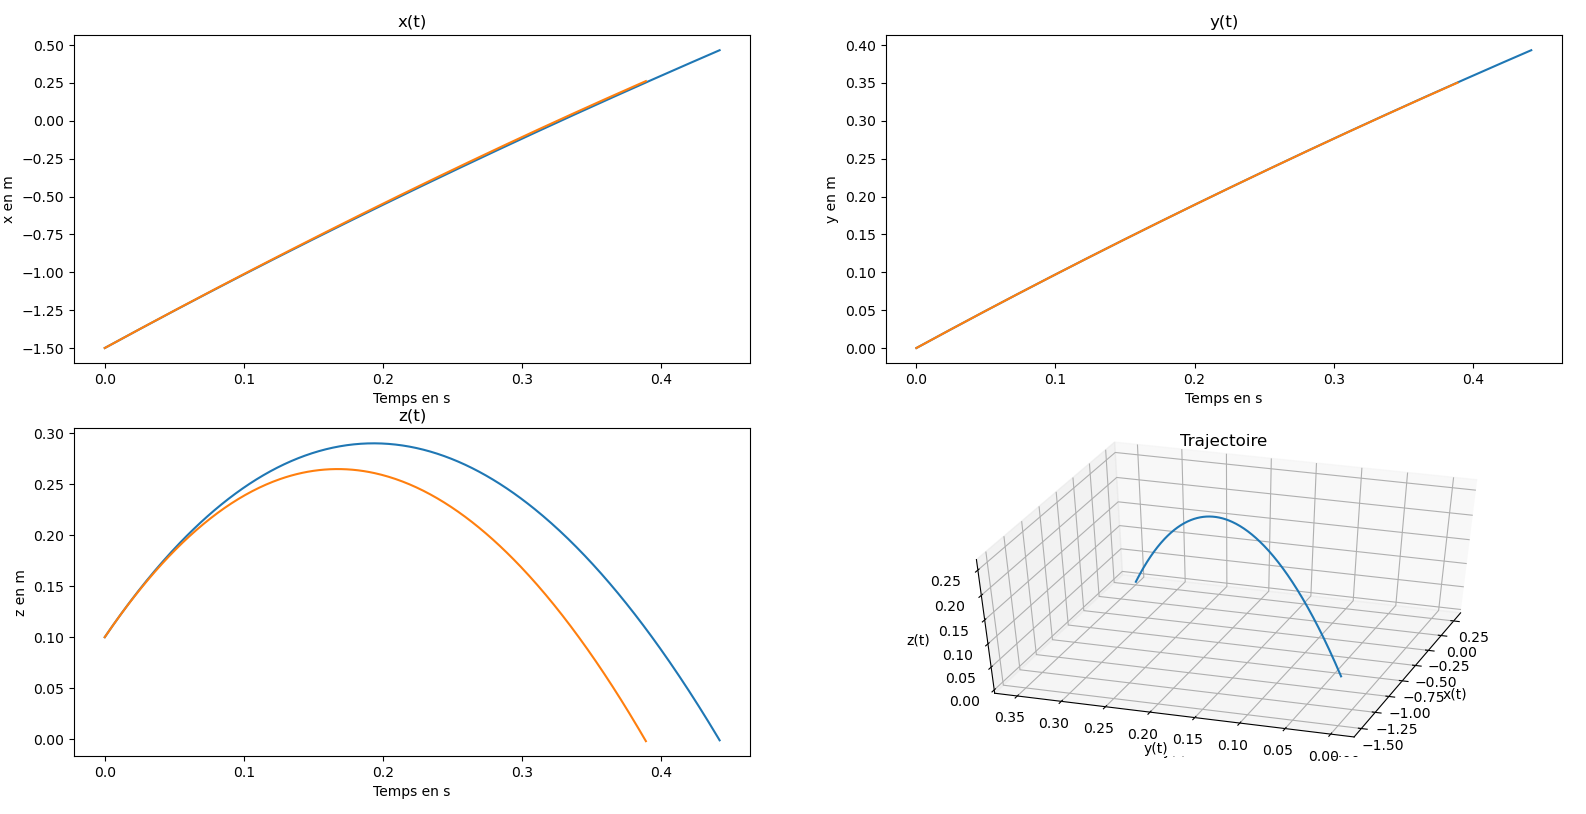
<center>Courbe bleu : sans effet, courbe orange : Effet top-spin</center>

En imposant $v_{x_0}=0$ et $\omega_y>0$ ou $v_{y_0}=0$ et $\omega_x<0$ on peut cependant voir l'effet léger sur la trajectoire d'une balle liftée. L'image suivante représente x(t) avec la première hypothèse.
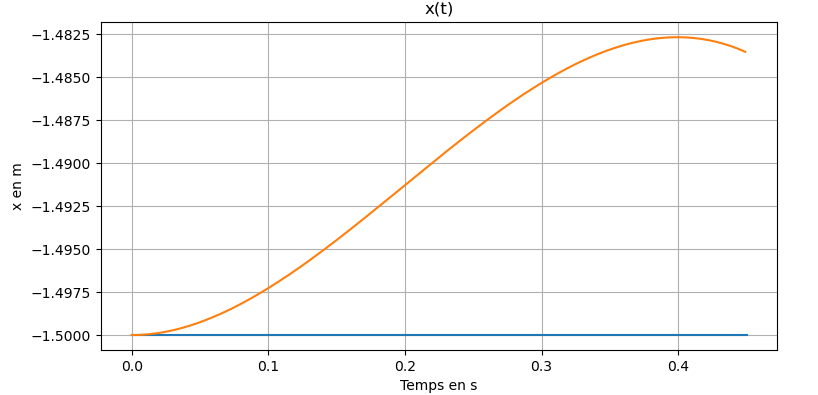
<center>Courbe bleu : sans effet, courbe orange : effet top-spin</center>

### Effet back-spin

Cet effet corrsepond à une vitesse de rotation de la balle positive sur $\vec{e_x}$ et/ou négative sur $\vec{e_y}$ de façon à ce que la composante de $\vec{F_{magnus}}$ sur $\vec{e_z}$ soit positive.
L'effet est donc l'opposé du top-spin : la balle tombe moins vite (et va donc plus loin) et l'effet est généralement négligeable sur le plan (xy).  
En imposant $v_{x_0}=0$ et $\omega_y<0$ on obtient la courbe suivante pour x(t).
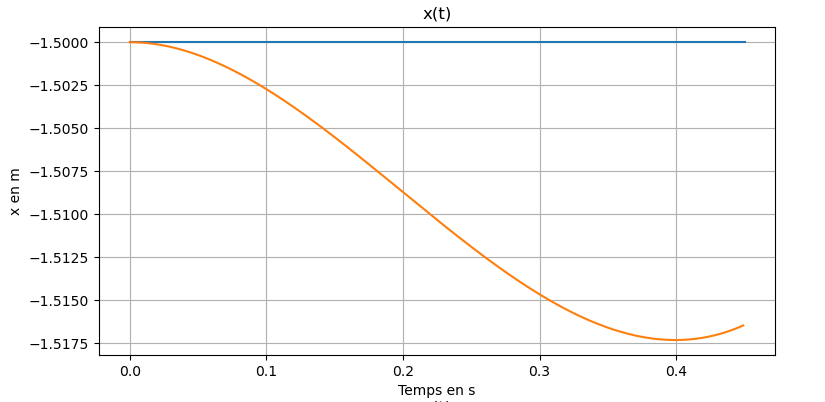
v<center>Courbe bleu : sans effet, courbe orange : effet back-spin</center>

### Effet side-spin

Cet effet correspond à une rotation de la balle autour de l'axe $\vec{e_z}$, quel que soit son signe.
Il n'a donc aucun impact sur z(t).
Dans le plan (xy), l'impact se fait sentir lorsque la vitesse de rotation est grande devant la vitesse de translation de la balle.  
La figure suivante a été obtenu pour $v_{x_0}=5,v_{y_0}=1$ et $\omega_z=100$. On voit bien que l'aspect négligeable de l'effet ne l'est que jusqu'à un certain point.

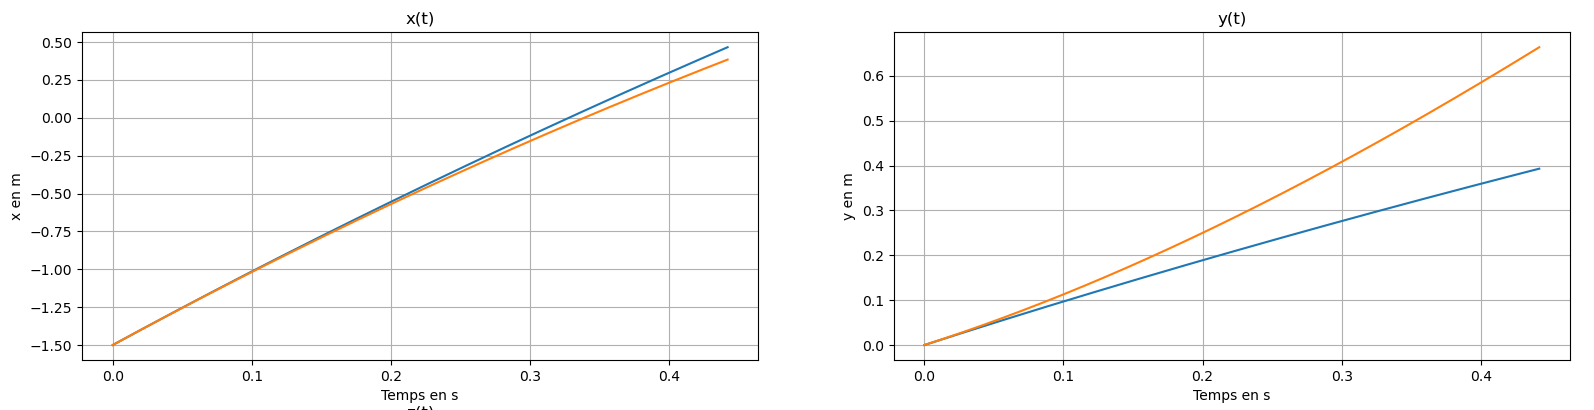
<center>Courbe bleu : sans effet, courbe orange : effet side-spin</center>
